In [1]:
import cv2
import numpy as np


In [2]:
# Load PCB image
img = cv2.imread('pcb.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Optional: Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5,5), 0)


In [3]:
edges = cv2.Canny(blur, threshold1=50, threshold2=150)


In [4]:
# Kernel for morphology
kernel = np.ones((3,3), np.uint8)

# Closing to fill small gaps in tracks
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

# Opening to remove small noise
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel, iterations=1)


In [5]:
contours, hierarchy = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy original image for annotation
annotated = img.copy()

# Loop through contours and mark defects
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 50:  # small area defects like missing solder
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(annotated, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(annotated, 'Missing Solder', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
    elif area >= 50:  # larger area defects like broken tracks
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(annotated, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(annotated, 'Broken Track', (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)


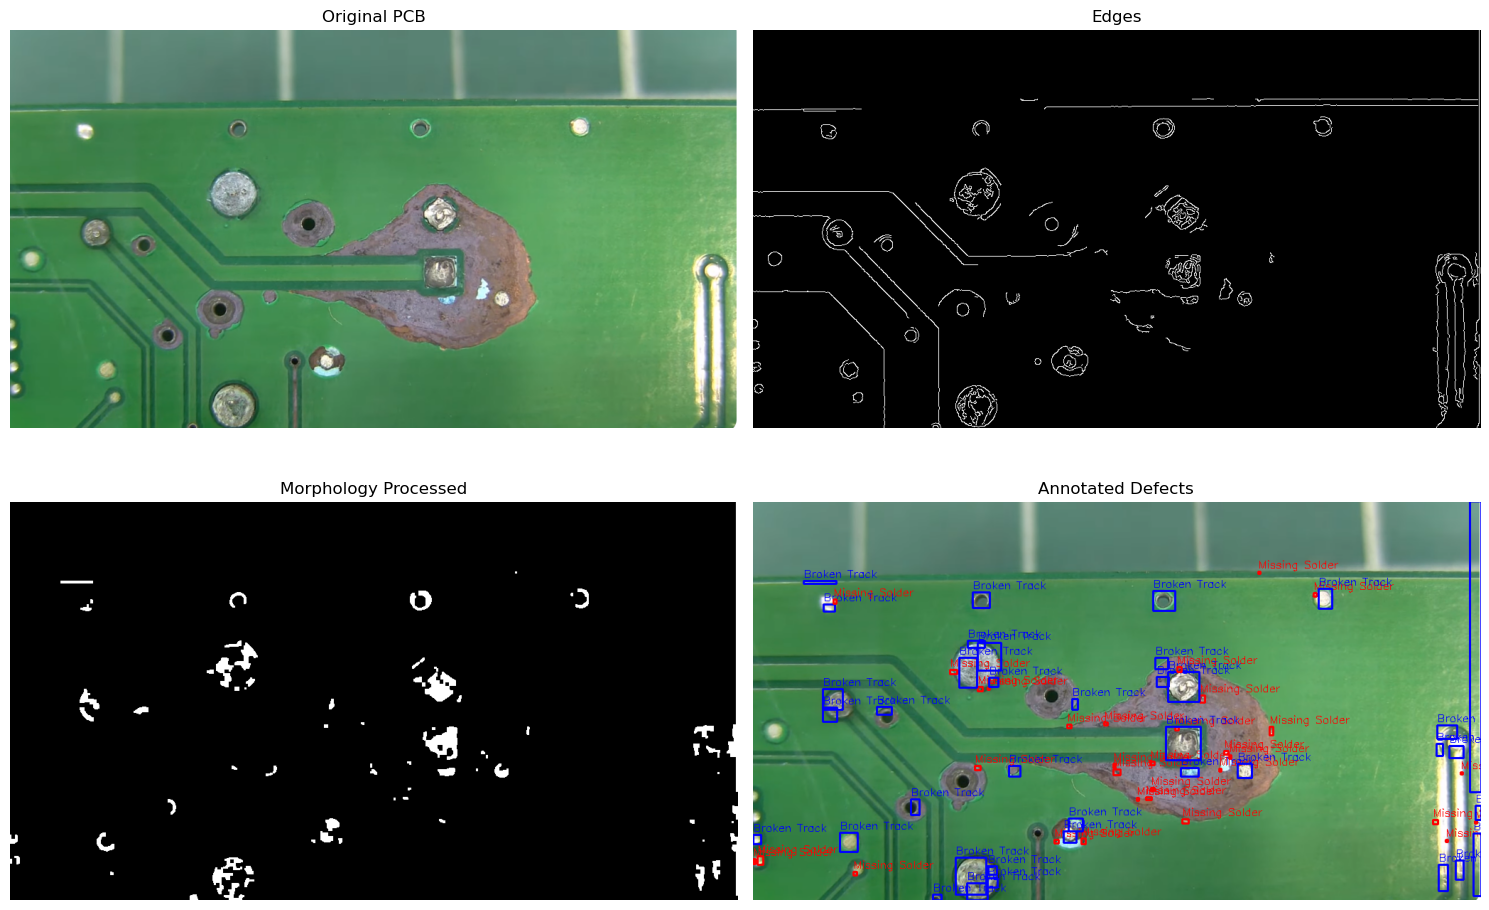

In [6]:
import matplotlib.pyplot as plt

# Convert BGR to RGB for correct color display in Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

# Plot all images
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("Original PCB")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(edges, cmap='gray')
plt.title("Edges")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(opened, cmap='gray')
plt.title("Morphology Processed")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(annotated_rgb)
plt.title("Annotated Defects")
plt.axis('off')

plt.tight_layout()
plt.show()
